<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Siphon THREDDS Jupyter Notebook Viewer</h1>
<h3>Dataset: HI-REGIONAL_4km_3.9_20181205_1600.gini</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">


<h4>Dependencies:</h4>
<div>
    <ul>
        <li>Siphon: `pip install siphon`</li>
        <li>matplotlib: `pip install matplotlib` or `conda install -c conda-forge matplotlib`</li>
        <li>ipywidgets:
            <ul><li>`pip install ipywidgets` or `conda install -c conda-forge ipywidgets`</li></ul>
                then
            <ul><li>Using Jupyter Notebook: `jupyter nbextension enable --py widgetsnbextension`</li>
                <li>Using JupyterLab:
                    <ul><li>Requires nodejs: `conda install nodejs`</li>
                        <li>`jupyter labextension install @jupyter-widgets/jupyterlab-manager`</li>
                </li></ul>
        </li>
        <li>numpy: `pip install numpy` or `conda install numpy`</li>
    </ul>
</div>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [4]:
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

In [5]:
catUrl = "https://thredds-dev.unidata.ucar.edu/thredds/catalog/satellite/3.9/HI-REGIONAL_4km/current/catalog.xml";
datasetName = "HI-REGIONAL_4km_3.9_20181205_1600.gini";

<h3>Access a dataset</h3>
With the TDS catalog url, we can use Siphon to get the dataset named `datasetName`.

In [6]:
catalog = TDSCatalog(catUrl)

In [7]:
ds = catalog.datasets[datasetName]
ds.name

'HI-REGIONAL_4km_3.9_20181205_1600.gini'

Datasets each have a set of access protocols:

In [8]:
list(ds.access_urls)

['OPENDAP',
 'CdmRemote',
 'CdmrFeature',
 'DAP4',
 'HTTPServer',
 'JupyterNotebook',
 'NetcdfSubset',
 'WMS',
 'WCS',
 'ISO',
 'NCML',
 'UDDC']

Siphon's `remote-access` returns a `Dataset` object, which opens the remote dataset and provides access to its metadata:

In [9]:
dataset = ds.remote_access()

In [10]:
list(dataset.ncattrs())

['Conventions',
 'source_id',
 'entity_id',
 'sector_id',
 'phys_elem',
 'time_coverage_start',
 'time_coverage_end',
 'NX',
 'NY',
 'Latitude0',
 'Longitude0',
 'LatitudeN',
 'LongitudeN',
 'LatitudeX',
 'title',
 'summary',
 'id',
 'keywords_vocabulary',
 'cdm_data_type',
 'featureType',
 'standard_name_vocabulary',
 'creator_name',
 'creator_url',
 'naming_authority',
 'geospatial_lat_min',
 'geospatial_lat_max',
 'geospatial_lon_min',
 'geospatial_lon_max',
 'imageResolution',
 'compressionFlag']

<h3>Display a variable:</h3>
<ul>
    <li>Run the cells below to get an interactive list of variables in this dataset.</li>
    <li>Select the variable you wish to view.</li>
    <li>Execute the next cell to display info about the selected variable and plot it.</li>
    <li>To plot a different variable, select it from the list and rerun the following cell.</li>


In [11]:
var_name = widgets.RadioButtons(
    options=list(dataset.variables),
    description='Variable:')


In [12]:
display(var_name)

RadioButtons(description='Variable:', options=('time', 'IR', 'x', 'y', 'Mercator'), value='time')

IR
['time', 'y', 'x']
(1, 520, 560)


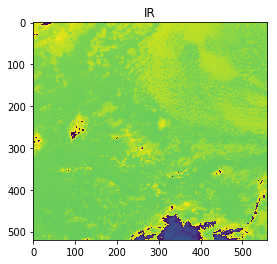

In [15]:
var = dataset.variables[var_name.value]
# display information about the variable
print(var.name)
print(list(var.dimensions))
print(var.shape)

%matplotlib inline
# attempt to plot the variable
canPlot = var.dtype == np.uint8 or np.can_cast(var.dtype, float, "same_kind") # Only plot numeric types
if (canPlot):
    ndims = np.squeeze(var[:]).ndim
    # for one-dimensional data, print value
    if (ndims == 0):
        print(var.name, ": ", var)
    # for two-dimensional data, make a line plot
    elif (ndims == 1):
        plt.plot(np.squeeze(np.array([range(len(np.squeeze(var[:])))])), np.squeeze(var[:]), 'bo', markersize=5)
        plt.title(var.name)
        plt.show()
    # for three-dimensional data, make an image
    elif (ndims == 2):
        plt.imshow(np.squeeze(var[:]))
        plt.title(var.name)
        plt.show()
    # for four or more dimensional data, print values
    else:
        print("Too many dimensions - Cannot display variable: ", var.name)
        print(var[:])
else:
    print("Not a numeric type - Cannot display variable: ", var.name)
    print(var[:])

<b>Note</b> that data are only transferred over the network when the variable is sliced, and only data corresponding to the slice are downloaded. In this case, we are asking for all of the data with `var[:]`.


<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<h3>More with Siphon</h3>
<div>To see what else you can do, view the <a href="https://unidata.github.io/siphon/latest/api/index.html">Siphon API</a>.</div>

In [ ]:
### Your code here ###